Importing Libraries
--

In [1]:
import json
import pandas as pd
from collections import defaultdict, Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords_set = stopwords.words("English")
import matplotlib.pyplot as plt
import numpy as np

Importing required files
--

In [2]:
articles = "./source_data/article.json"
careerpath = "./source_data/careerpathpage.json"
category = "./source_data/categorypage.json"
coverletter = "./source_data/coverletter.json"
resume_sample = "./source_data/resumesamplepage.json"

Loading required json files to respective lists
--

In [3]:
cp = []
with open(careerpath, "r", encoding="utf-8") as f:
    for line in f:
        cp.append(json.loads(line))

In [44]:
art = []
with open(articles, "r", encoding="utf-8") as f:
    for line in f:
        art.append(json.loads(line))

In [5]:
cat = []
with open(category, "r", encoding="utf-8") as f:
    for line in f:
        cat.append(json.loads(line))

In [6]:
cl = []
with open(coverletter, "r", encoding="utf-8") as f:
    for line in f:
        cl.append(json.loads(line))

In [7]:
rs = []
with open(resume_sample, "r", encoding="utf-8") as f:
    for line in f:
        rs.append(json.loads(line))

Unique categories for each json file
--

In [8]:
print("category->",cat[0].keys())
print("articles->",art[0].keys())
print("careerpath->",cp[0].keys())
print("coverletter->",cl[0].keys())
print("resumesample->",rs[0].keys())

category-> dict_keys(['_id', 'title', 'contentA', 'category', 'locale'])
articles-> dict_keys(['_id', 'title', 'content', 'category', 'urlRoute', 'contentTitle', 'locale'])
careerpath-> dict_keys(['_id', 'locale', 'urlRoute', 'h1', 'primaryContent'])
coverletter-> dict_keys(['_id', 'title', 'contentA', 'contentB', 'category', 'urlRoute', 'locale'])
resumesample-> dict_keys(['_id', 'title', 'contentA', 'contentB', 'category', 'urlRoute', 'locale'])


Checking if there is a link between the documents across the json files
--

In [9]:
for art_ in art:
    for cat_ in cat:
        if cat_["_id"]["$oid"] == art_["_id"]["$oid"]:
            print(art_["_id"])
            
    for cp_ in cp:
        if cp_["_id"]["$oid"] == art_["_id"]["$oid"]:
            print(art_["_id"])
            
    for cl_ in cl:
        if cl_["_id"]["$oid"] == art_["_id"]["$oid"]:
            print(art_["_id"])
            
    for rs_ in rs:
        if rs_["_id"]["$oid"] == art_["_id"]["$oid"]:
            print(cl_["_id"])

In [10]:
for cat_ in cat:
    for cp_ in cp:
        if cp_["_id"]["$oid"] == cat_["_id"]["$oid"]:
            print(cp_["_id"])
            
    for cl_ in cl:
        if cl_["_id"]["$oid"] == cat_["_id"]["$oid"]:
            print(cl_["_id"])
            
    for rs_ in rs:
        if rs_["_id"]["$oid"] == cat_["_id"]["$oid"]:
            print(rs_["_id"])

In [11]:
for cl_ in cl:
    for cp_ in cp:
        if cp_["_id"]["$oid"] == cl_["_id"]["$oid"]:
            print(cl_["_id"])
            
    for rs_ in rs:
        if rs_["_id"]["$oid"] == cl_["_id"]["$oid"]:
            print(cl_["_id"])

In [12]:
for cp_ in cp:
    for rs_ in rs:
        if rs_["_id"]["$oid"] == cp_["_id"]["$oid"]:
            print(cp_["_id"])

Category dictionary with title and content
--

In [13]:
cat_data = defaultdict(list)
for cat_ in cat:
    cat_data[cat_["category"]].append({cat_["title"]:cat_["contentA"]})
for key, values in cat_data.items():
    print(key)
    for val in values:
        print(val.keys())
    print()

warehouse-resume
dict_keys(['Warehouse Resumes'])

education-resumes
dict_keys(['Education Resumes'])

retail-resume-samples
dict_keys(['Retail Resume Samples'])

construction-resumes
dict_keys(['Construction Resumes'])

safety-and-security-resumes
dict_keys(['Safety and Security Resumes'])

customer-service-resumes
dict_keys(['Customer Service Resumes'])

food-service-resumes
dict_keys(['Food Service Resumes'])

business-resumes
dict_keys(['Business Resumes'])

information-technology-resumes
dict_keys(['Information Technology Resumes'])

design-and-media-resumes
dict_keys(['Design and Media Resumes'])

administrative-resumes
dict_keys(['Administrative Resumes'])

finance-resumes
dict_keys(['Finance Resumes'])

manufacturing-and-maintenance-resumes
dict_keys(['Manufacturing and Maintenance Resumes'])

government-and-nonprofit-resumes
dict_keys(['Government Resumes'])

engineering-resumes
dict_keys(['Engineering Resumes'])

legal-resumes
dict_keys(['Legal Resumes'])

childcare-resumes
d

Article dictionary with urlRoute, title and content
--

In [45]:
art_data = defaultdict(list)
for art_ in art:
    if "title" in art_:
        art_data[art_["category"]].append({art_["urlRoute"]:{art_["title"]:art_["content"]}})
    else:
        art_data[art_["category"]].append({art_["urlRoute"]:{art_["contentTitle"]:art_["content"]}})
for key, values in art_data.items():
    print(key)
    for val in values:
        print(val.keys())
    print()

career-development
dict_keys(['how-to-develop-a-work-schedule'])
dict_keys(['collaboration-skills'])
dict_keys(['management-skills'])
dict_keys(['empowerment'])
dict_keys(['learning-styles-for-career-development'])
dict_keys(['business-development-skills'])
dict_keys(['inductive-reasoning'])
dict_keys(['cognitive-ability'])
dict_keys(['performance-management-system'])
dict_keys(['critical-path-project-management'])
dict_keys(['succession-planning'])
dict_keys(['how-to-write-a-letter-of-recommendation-with-examples'])
dict_keys(['cdl-certification-guide'])
dict_keys(['guide-to-unemployment-benefits'])
dict_keys(['guide-to-thank-you-notes'])
dict_keys(['icebreaker-activities-for-a-work-event'])
dict_keys(['hr-documentation'])
dict_keys(['deductive-reasoning'])
dict_keys(['the-ultimate-guide-to-professionalism'])
dict_keys(['active-listening-skills'])
dict_keys(['character-traits-definition-and-examples'])
dict_keys(['when-to-use-to-whom-it-may-concern'])
dict_keys(['letter-of-recommendat

Career Path dictionary with urlRoute, title and content
--

In [17]:
cp_data = defaultdict(list)
for cp_ in cp:
    cp_data[cp_["h1"]].append({cp_["urlRoute"]:cp_["primaryContent"]})
for key, values in cp_data.items():
    print(key)
    for val in values:
        print(val.keys())
    print()

Learn About Being a Toxicologist
dict_keys(['what-does-a-toxicologist-do'])

Learn About Being a Data Architect
dict_keys(['what-does-a-data-architect-do'])

Learn About Being an Automotive Engineer
dict_keys(['what-does-an-automotive-engineer-do'])

Learn About Being a Project Coordinator
dict_keys(['what-does-a-project-coordinator-do'])

Learn About Being a UX Designer
dict_keys(['what-does-a-ux-designer-do'])

Learn About Being a Physical Therapist
dict_keys(['what-does-a-physical-therapist-do'])

Learn About Being a Loan Processor
dict_keys(['what-does-a-loan-processor-do'])

Learn About Being a Neonatal Nurse
dict_keys(['what-does-a-neonatal-nurse-do'])

Learn About Being an Electrical Engineer
dict_keys(['what-does-an-electrical-engineer-do'])

Learn About Being a Construction Superintendent
dict_keys(['what-does-a-construction-superintendent-do'])

Learn About Being a Social Media Manager
dict_keys(['what-does-a-social-media-manager-do'])

Learn About Being a Delivery Driver
dic

Cover-Letter dictionary with urlRoute, title and content
--

In [18]:
cl_data = defaultdict(list)
for cl_ in cl:
    cl_data[cl_["category"]].append({cl_["urlRoute"]:{cl_["title"]:[cl_["contentA"],cl_["contentB"]]}})
for key, values in cl_data.items():
    print(key)
    for val in values:
        print(val.keys())
    print()

Medical and Nursing
dict_keys(['dental-hygienist'])
dict_keys(['dental-assistant'])
dict_keys(['veterinary-technician'])
dict_keys(['occupational-therapist'])
dict_keys(['pharmacist'])
dict_keys(['registered-nurse'])
dict_keys(['medical-assistant'])
dict_keys(['nursing-student'])
dict_keys(['physician-assistant'])
dict_keys(['psychologist'])
dict_keys(['resident-assistant'])
dict_keys(['physician'])
dict_keys(['pharmacy-technician'])
dict_keys(['veterinary-assistant'])
dict_keys(['nurse-practitioner'])
dict_keys(['veterinarian'])
dict_keys(['nursing-assistant'])
dict_keys(['physical-therapist'])
dict_keys(['dentist'])

Business
dict_keys(['manager'])
dict_keys(['executive-assistant'])
dict_keys(['consultant'])
dict_keys(['analyst'])
dict_keys(['project-manager'])
dict_keys(['program-manager'])
dict_keys(['project-coordinator'])
dict_keys(['management-consultant'])
dict_keys(['business-analyst'])
dict_keys(['property-manager'])
dict_keys(['operations-manager'])
dict_keys(['account-manag

Resume dictionary with urlRoute, title and content
--

In [19]:
rs_data = defaultdict(list)
for rs_ in rs:
    rs_data[rs_["category"]].append({rs_["urlRoute"]:{rs_["title"]:[rs_["contentA"],rs_["contentB"]]}})
for key, values in rs_data.items():
    print(key)
    for val in values:
        print(val.keys())
    print()

legal-resumes
dict_keys(['paralegal'])
dict_keys(['attorney'])
dict_keys(['legal-secretary'])
dict_keys(['legal-assistant'])

manufacturing-and-maintenance-resumes
dict_keys(['journeyman-electrician'])
dict_keys(['quality-assurance-manager'])
dict_keys(['painter'])
dict_keys(['automotive-mechanic'])
dict_keys(['production-manager'])
dict_keys(['operations-supervisor'])
dict_keys(['senior-technician'])
dict_keys(['hvac-installer'])
dict_keys(['electrician'])
dict_keys(['repair-technician'])
dict_keys(['cnc-machinist'])
dict_keys(['welder'])
dict_keys(['sanitation-worker'])
dict_keys(['machine-operator'])
dict_keys(['cleaner'])
dict_keys(['hvac-technician'])
dict_keys(['assembler'])
dict_keys(['production-supervisor'])
dict_keys(['hvac-service-technician'])
dict_keys(['handyworker'])
dict_keys(['sterile-processing-technician'])
dict_keys(['diesel-mechanic'])
dict_keys(['car-sales'])
dict_keys(['warehouse-worker'])
dict_keys(['maintenance-mechanic'])
dict_keys(['production-operator'])
dic

Combining Category and Resume Sample dictionaries
--

In [21]:
cat_rs = defaultdict(list)
for cat_key, cat_val in cat_data.items():
    for rs_key, rs_val in rs_data.items():
        if cat_key == rs_key:
            for val in cat_val[0].values():
                cat_rs[cat_key].append(val)
            for rs_ in rs_val:
                cat_rs[cat_key].extend(({k:values} for k,v in rs_.items() for values in v.values()))

cat_rs["legal-resumes"]

["When you're writing your legal resume, carefully consider the audience. Depending on whether you are applying for a large law firm, a small practice or a corporation, you may want to highlight different experiences and qualifications. Choose the legal job title that interests you below and browse the resume examples for inspiration.",
 {'paralegal': ["Writing a great Paralegal resume is an important step in your job search journey. When writing your resume, be sure to reference the [job description](https://www.indeed.com/career-advice/browse) and highlight any skills, awards and certifications that match with the requirements. You may also want to include a headline or summary statement that clearly communicates your goals and qualifications.\n\nThe following Paralegal resume samples and examples will help you write a resume that best highlights your experience and qualifications. If you're ready to apply for your next role, upload your resume to [Indeed Resume](https://www.indeed.c

In [22]:
cl_data["Legal"]

[{'paraprofessional': {'Paraprofessional': ["Writing a great Paraprofessional cover letter is an important step in your job search journey. When writing a cover letter, be sure to reference the requirements listed in the [job description](https://www.indeed.com/career-advice/browse). In your letter, reference your most relevant or exceptional qualifications to help employers see why you're a great fit for the role. In the same way that you might reference [resume samples](https://www.indeed.com/career-advice/resume-samples), the following Paraprofessional cover letter example will help you to write a cover letter that best highlights your experience and qualifications. If you're ready to apply for your next role, upload your resume to [Indeed Resume](https://www.indeed.com/create-resume) to get started.",
    "Ivy Haddington\n\n(123) 456-7891\n\nihaddington@email.com\n\nMay 1, 2018\n\nDear Hiring Manager,\n\nI am writing to you in regards to the Paraprofessional job opening at River Te

Instances of different categories in article.json
--

In [23]:
c=0
for key in cat_data:
    c+=len(cat_data[key])
print("Total Categories:",c)

c=0
for key in art_data:
    c+=len(art_data[key])
print("Total Articles:",c)

c=0
for key in cp_data:
    c+=len(cp_data[key])
print("Total Careerpaths:",c)

c=0
for key in cl_data:
    c+=len(cl_data[key])
print("Total Coverletters:",c)

c=0
for key in rs_data:
    c+=len(rs_data[key])
print("Total ResumeSamples:",c)

Total Categories: 24
Total Articles: 13639
Total Careerpaths: 541
Total Coverletters: 340
Total ResumeSamples: 344


In [24]:
def show_word_cloud(words):
    '''
    Create a wordcloud
    '''
    wordcloud = WordCloud(stopwords = stopwords_set, width=1000, height=600).generate(" ".join(words))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()    

In [25]:
def corpus_info(corpus):
    '''
    Generate and print corpus information
    '''
    counter = Counter(word.lower() for key,values in corpus.items() for val in values for v in val.values() for word in v.split())
    words = [word.lower() for key,values in corpus.items() for val in values for v in val.values() for word in v.split()]
    print("Total tokens:", sum(list(counter.values())))
    print("Total documents:", len([corpus[key] for key in corpus]))  
    print("Vocabulary size:", len(counter))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(20)]))
    print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))    
    print("Wordcloud:")
    show_word_cloud(words)
    return sum(list(counter.values())), len([corpus[key] for key in corpus]), len(counter)

Total tokens: 1424
Total documents: 24
Vocabulary size: 430
Most common words: your and to the you a in as may for of or want you're highlight job when that on writing
Most common words excluding stopwords: may want highlight job writing resume experience jobs summary qualifications
Wordcloud:


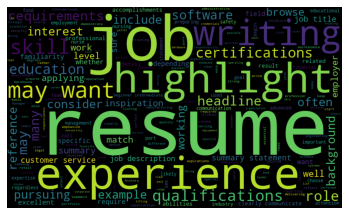

In [26]:
cat_tokens, cat_docs, cat_vocab = corpus_info(cat_data)

Total tokens: 718431
Total documents: 541
Vocabulary size: 26479
Most common words: and to the a of in * for or you with as their work an they are your is skills
Most common words excluding stopwords: work skills may also need experience training must certification degree
Wordcloud:


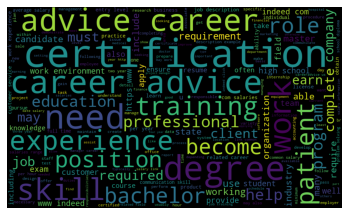

In [27]:
cp_tokens, cp_docs, cp_vocab = corpus_info(cp_data)

In [28]:
def corpus_info(corpus):
    '''
    Generate and print corpus information
    '''    
    c=0
    counter = Counter(word.lower() for key,values in corpus.items() for val in values for v in val.values() for v_ in v.values() for word in v_.split())
    words = [word.lower() for key,values in corpus.items() for val in values for v in val.values() for v_ in v.values() for word in v_.split()]
    print("Total tokens:", sum(list(counter.values())))
    for key in corpus:
        c+=len(corpus[key])    
    print("Total documents:", c)         
    print("Vocabulary size:", len(counter))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(20)]))
    print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))    
    print("Wordcloud:")
    show_word_cloud(words)
    return sum(list(counter.values())), c, len(counter)    

Total tokens: 18270630
Total documents: 13639
Vocabulary size: 289253
Most common words: to the and a you of your in for can - or is that with ### are an as their
Most common words excluding stopwords: work may help also job skills use make per company
Wordcloud:


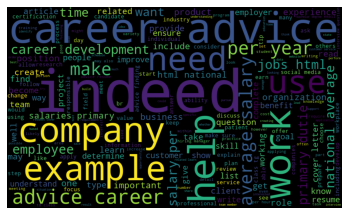

In [29]:
stopwords_set.extend(["www","https","com"])
art_tokens, art_docs, art_vocab = corpus_info(art_data)

In [30]:
def corpus_info(corpus):
    '''
    Generate and print corpus information
    '''    
    c=0
    counter = Counter(word.lower() for key,values in corpus.items() for val in values for v in val.values() for v_ in v.values() for lst in v_ for word in lst.split())
    words = [word.lower() for key,values in corpus.items() for val in values for v in val.values() for v_ in v.values() for lst in v_ for word in lst.split()]
    print("Total tokens:", sum(list(counter.values())))
    for key in corpus:
        c+=len(corpus[key])        
    print("Total documents:", c)      
    print("Vocabulary size:", len(counter))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(20)]))
    print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))    
    print("Wordcloud:")
    show_word_cloud(words)
    return sum(list(counter.values())), c, len(counter)        

Total tokens: 135595
Total documents: 340
Vocabulary size: 9320
Most common words: to the i and a in your for my of that cover at you as letter with reference an help
Most common words excluding stopwords: cover letter reference help great writing experience position apply job
Wordcloud:


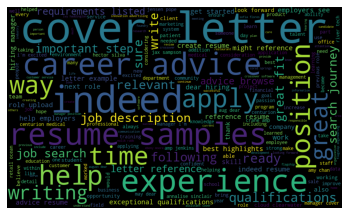

In [31]:
cl_tokens, cl_docs, cl_vocab = corpus_info(cl_data)

Total tokens: 77197
Total documents: 344
Vocabulary size: 6426
Most common words: your and to the a resume * you that in of for experience writing qualifications. include or with an is
Most common words excluding stopwords: resume experience writing include job certifications may best summary skills
Wordcloud:


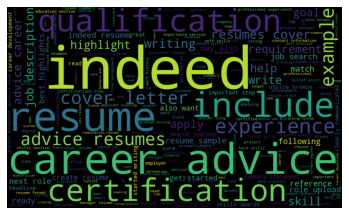

In [32]:
rs_tokens, rs_docs, rs_vocab = corpus_info(rs_data)

In [39]:
def visualization(a,b,c,d, task):
    '''
    Visualize corpus information
    '''    
    data = [[a],[b], [c], [d]]
    X = np.arange(1)
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'r', width = 0.1)
    ax.bar(X + 0.25, data[1], color = 'g', width = 0.1)
    ax.bar(X + 0.50, data[2], color = 'b', width = 0.1)
    ax.bar(X + 0.75, data[3], color = 'c', width = 0.1)
    plt.xlabel(task)
    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.legend(labels=['category', 'careerpath', 'coverletter', 'resumesample'])

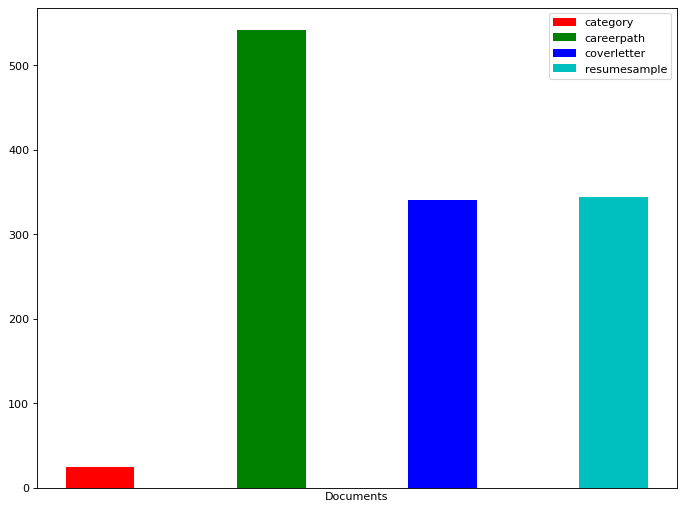

In [40]:
visualization(cat_docs, cp_docs, cl_docs, rs_docs, "Documents")

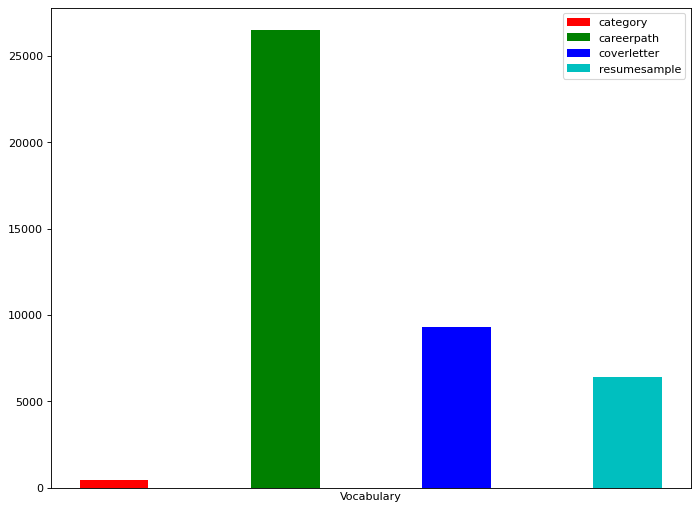

In [42]:
visualization(cat_vocab, cp_vocab, cl_vocab, rs_vocab, "Vocabulary")

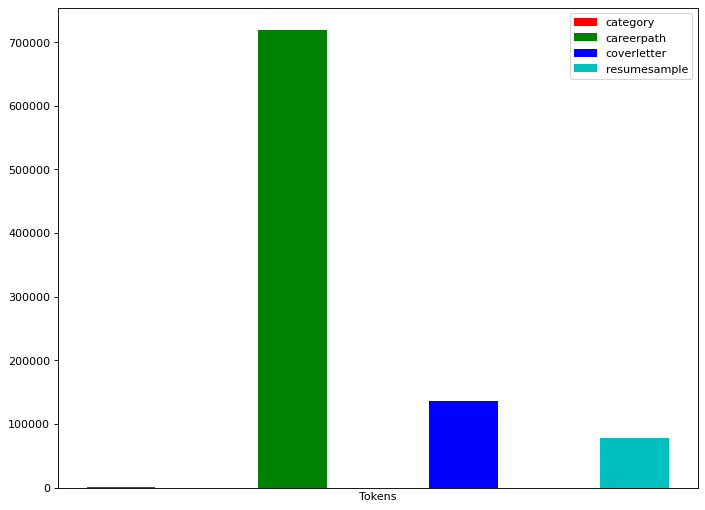

In [43]:
visualization(cat_tokens, cp_tokens, cl_tokens, rs_tokens, "Tokens")

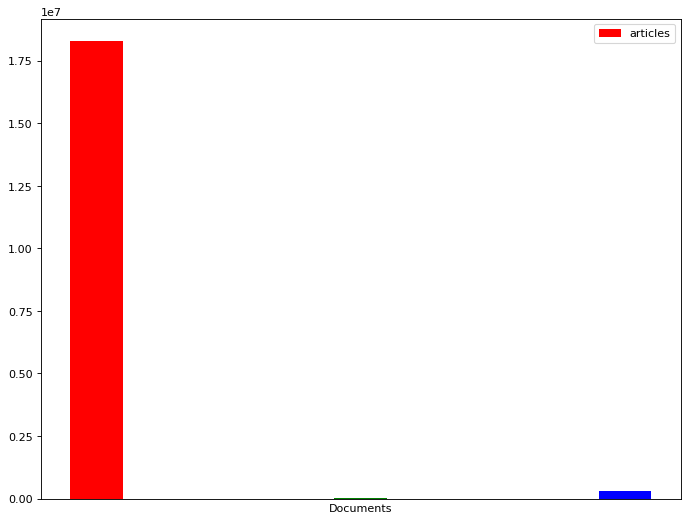

In [36]:
data = [[art_tokens],[art_docs], [art_vocab]]
X = np.arange(1)
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.05)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.05)
ax.bar(X + 0.50, data[2], color = 'b', width = 0.05)

plt.xlabel("Documents")
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
ax.legend(labels=['articles'])